In [1]:
%pylab inline
import numpy as np
np.set_printoptions(precision=6, linewidth=110)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import scipy.interpolate as interpolate
# import scipy.integrate as integrate
# import scipy.optimize as optimize

import pycbc.filter
import pycbc.types
import pycbc.psd

Populating the interactive namespace from numpy and matplotlib



In [2]:
sys.path.insert(0, '../src')

import waveform as wave
import waveformset as ws
import surrogate
import diagnostics
import plotparams

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(surrogate)
imp.reload(diagnostics)
imp.reload(plotparams)

import constants
imp.reload(constants)
from constants import *

# Histogram of errors

In [25]:
# Load errors data
errors_lhd = np.loadtxt('../data/flowp00015/errors_test_set2_lhd.txt')
errors_uncsamp = np.loadtxt('../data/flowp00015/errors_test_set2_lhd_uncsamp.txt')
errors_rand = np.loadtxt('../data/flowp00015/errors_test_set2_lhd_uncsamp_rand.txt')

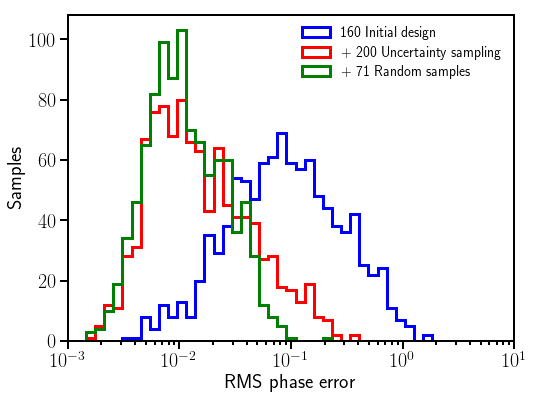

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('RMS phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

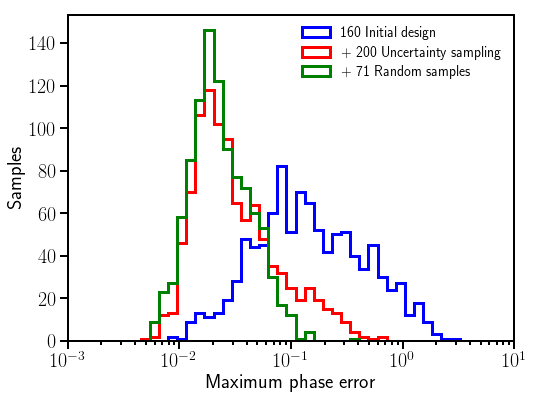

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('Maximum phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

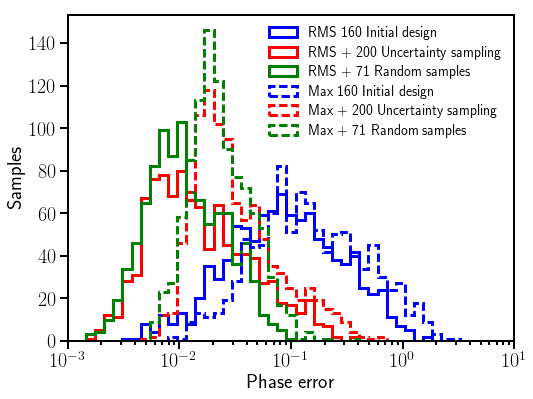

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'RMS 160 Initial design')
ax.hist(errors_uncsamp[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'RMS + 200 Uncertainty sampling')
ax.hist(errors_rand[:, 5], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'RMS + 71 Random samples')

ax.hist(errors_lhd[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='--', lw=3, color='blue', alpha=1.0, label=r'Max 160 Initial design')
ax.hist(errors_uncsamp[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='--', lw=3, color='red', alpha=1.0, label=r'Max + 200 Uncertainty sampling')
ax.hist(errors_rand[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='--', lw=3, color='green', alpha=1.0, label=r'Max + 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('Phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

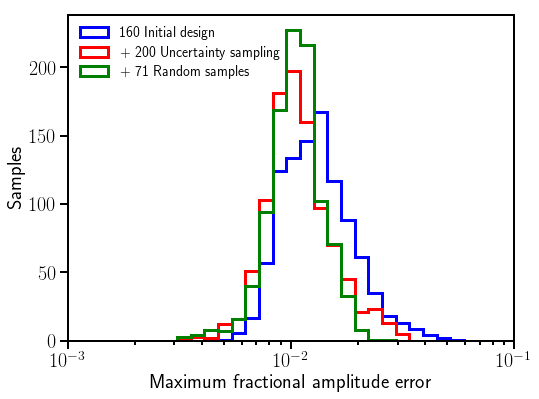

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-3, 1.0e-1])
ax.set_xlabel('Maximum fractional amplitude error')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

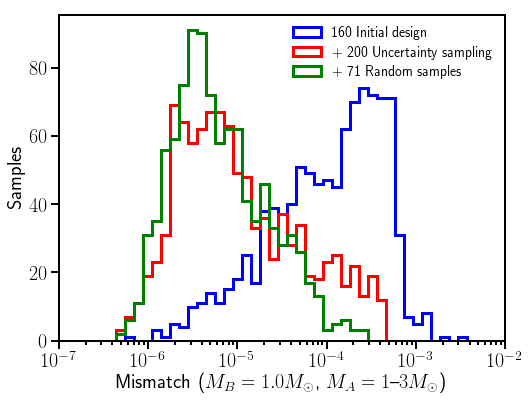

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-7, 1.0e-2])
ax.set_xlabel(r'Mismatch ($M_B=1.0M_\odot$, $M_A=1$--$3M_\odot$)')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

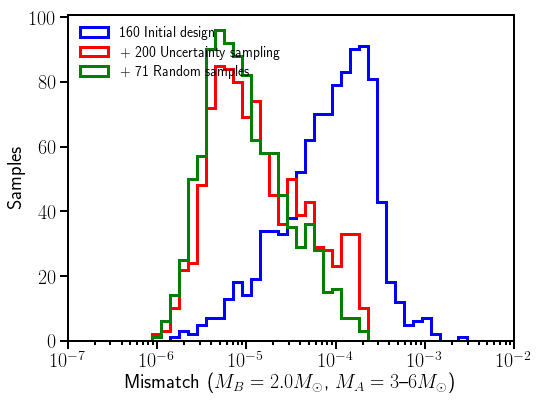

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 9], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 9], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 9], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_xlim([1.0e-7, 1.0e-2])
ax.set_xlabel(r'Mismatch ($M_B=2.0M_\odot$, $M_A=3$--$6M_\odot$)')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

# Sampled parameters

In [5]:
trainset = ws.HDF5WaveformSet('../data/flowp00015/dh_training_set_lhd_uncsamp_rand.hdf5')
params_all = trainset.parameters()

In [6]:
params_lhd = params_all[:160]
params_uncsamp = params_all[160:360]
params_rand = params_all[360:]
len(params_lhd), len(params_uncsamp), len(params_rand)

(160, 200, 71)

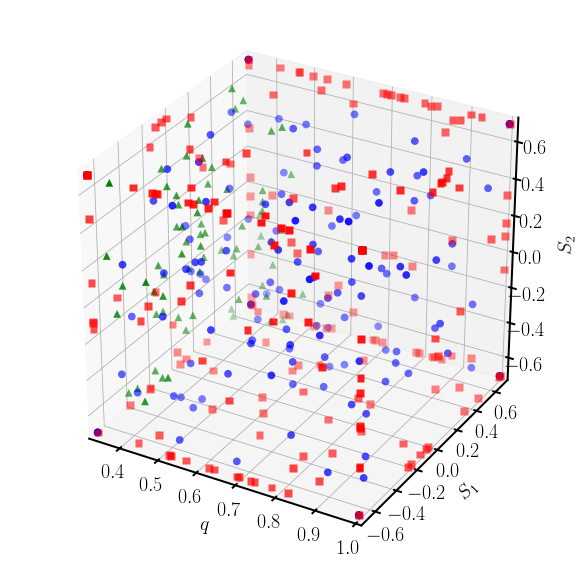

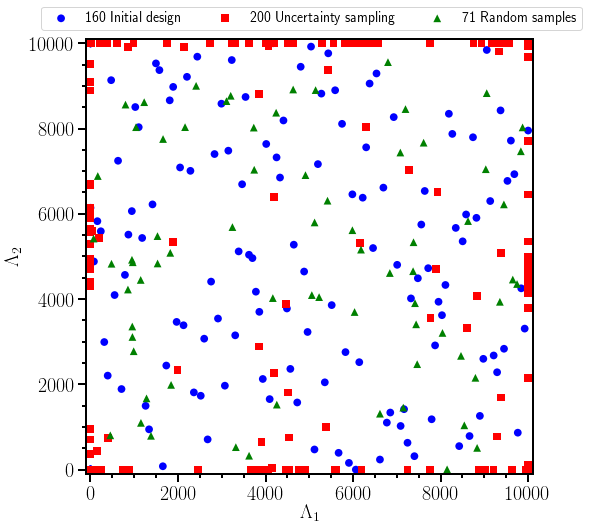

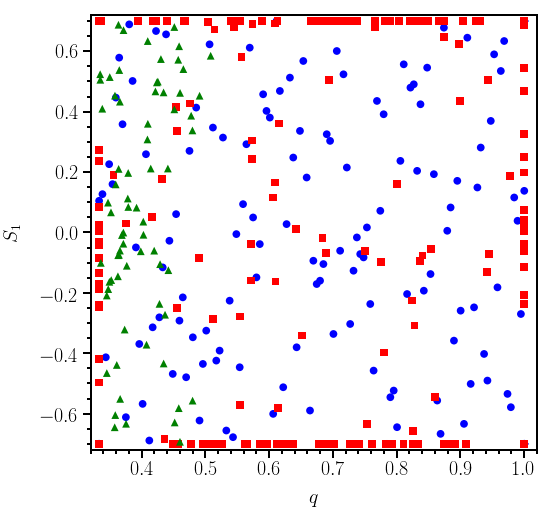

In [56]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')

x, y, z = params_lhd[:, 0], params_lhd[:, 1], params_lhd[:, 2]
axes.scatter(x, y, z, c='b', edgecolor='none', marker='o', s=60)

x, y, z = params_uncsamp[:, 0], params_uncsamp[:, 1], params_uncsamp[:, 2]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='s', s=60)

x, y, z = params_rand[:, 0], params_rand[:, 1], params_rand[:, 2]
axes.scatter(x, y, z, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(0.333, 1.0)
axes.set_ylim(-0.7, 0.7)
axes.set_zlim(-0.7, 0.7)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.set_zlabel('$S_2$', labelpad=18)


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 3], params_lhd[:, 4]
axes.scatter(x, y, c='b', edgecolor='none', marker='o', s=60, label='160 Initial design')

x, y = params_uncsamp[:, 3], params_uncsamp[:, 4]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60, label='200 Uncertainty sampling')

x, y = params_rand[:, 3], params_rand[:, 4]
axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60, label='71 Random samples')

axes.set_xlim(-100, 10100)
axes.set_ylim(-100, 10100)
axes.set_xlabel('$\Lambda_1$')
axes.set_ylabel('$\Lambda_2$')
axes.minorticks_on()
axes.legend(ncol=3, loc=(-0.1, 1.02))


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 0], params_lhd[:, 1]
axes.scatter(x, y, c='b', edgecolor='none', marker='o', s=60)

x, y = params_uncsamp[:, 0], params_uncsamp[:, 1]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60)

x, y = params_rand[:, 0], params_rand[:, 1]
axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(0.32, 1.02)
axes.set_ylim(-0.72, 0.72)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.minorticks_on()

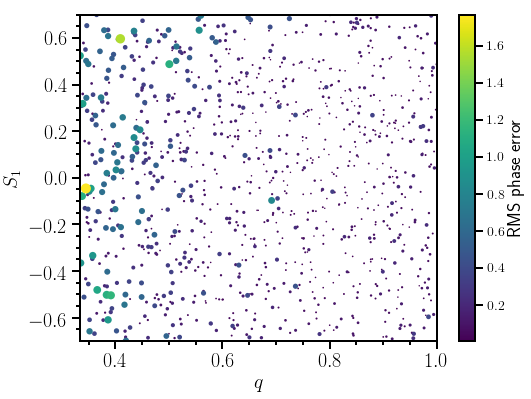

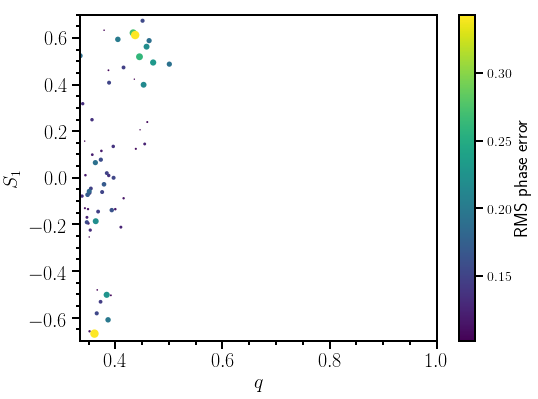

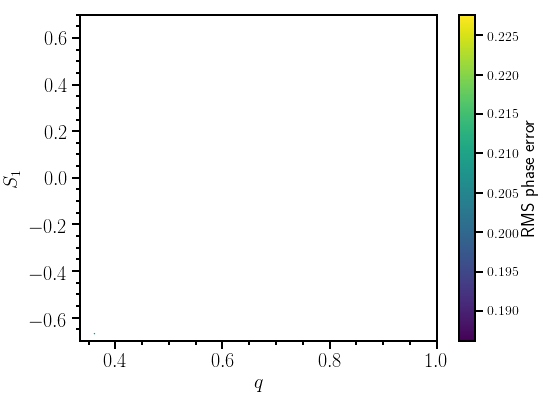

In [90]:
threshold = None
x = errors_lhd[:, 0]
y = errors_lhd[:, 1]
error = errors_lhd[:, 5]

fig, axes = plt.subplots(1, figsize=(8, 6))
diagnostics.max_error_2d_projection_plot(
    axes, x, y, error, threshold=threshold,
    x_label=r'$q$', y_label=r'$S_{1}$', colorbar=True, colorbarlabel='RMS phase error')
axes.set_xlim(1./3., 1.)
axes.set_ylim(-0.7, 0.7)
axes.minorticks_on()


threshold = 0.1
x = errors_uncsamp[:, 0]
y = errors_uncsamp[:, 1]
error = errors_uncsamp[:, 5]

fig, axes = plt.subplots(1, figsize=(8, 6))
diagnostics.max_error_2d_projection_plot(
    axes, x, y, error, threshold=threshold,
    x_label=r'$q$', y_label=r'$S_{1}$', colorbar=True, colorbarlabel='RMS phase error')
axes.set_xlim(1./3., 1.)
axes.set_ylim(-0.7, 0.7)
axes.minorticks_on()


threshold = 0.1
x = errors_rand[:, 0]
y = errors_rand[:, 1]
error = errors_rand[:, 5]

fig, axes = plt.subplots(1, figsize=(8, 6))
diagnostics.max_error_2d_projection_plot(
    axes, x, y, error, threshold=threshold,
    x_label=r'$q$', y_label=r'$S_{1}$', colorbar=True, colorbarlabel='RMS phase error')
axes.set_xlim(1./3., 1.)
axes.set_ylim(-0.7, 0.7)
axes.minorticks_on()

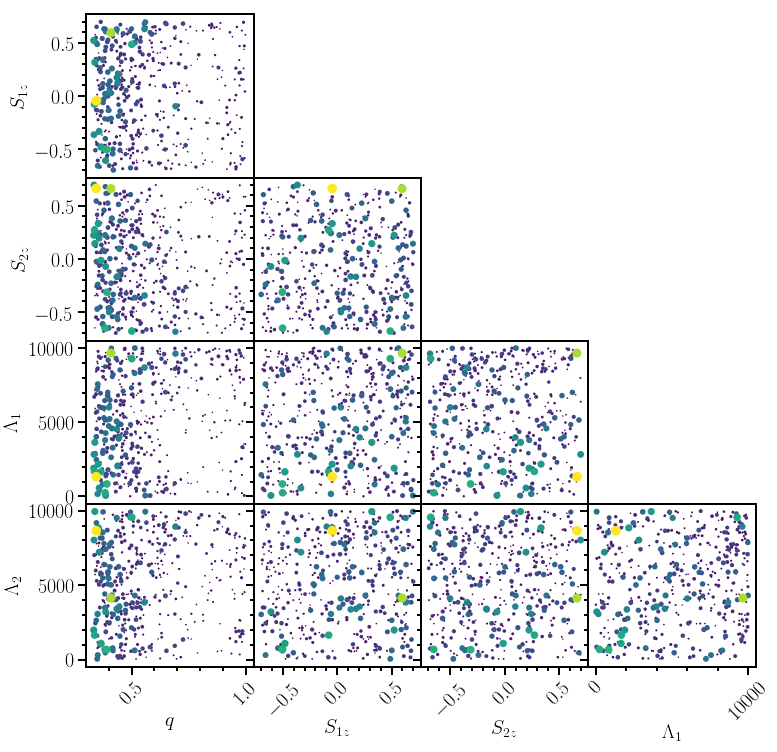

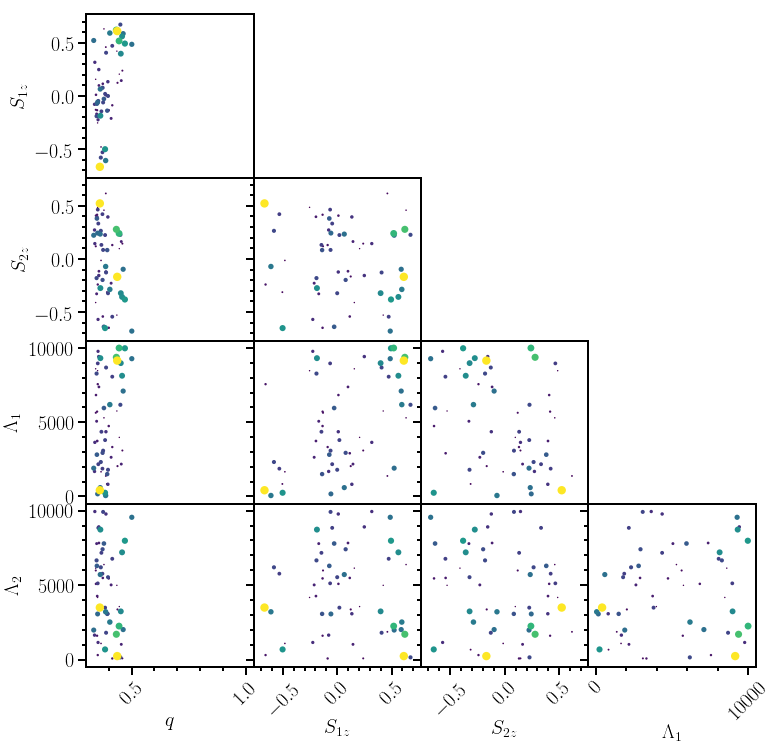

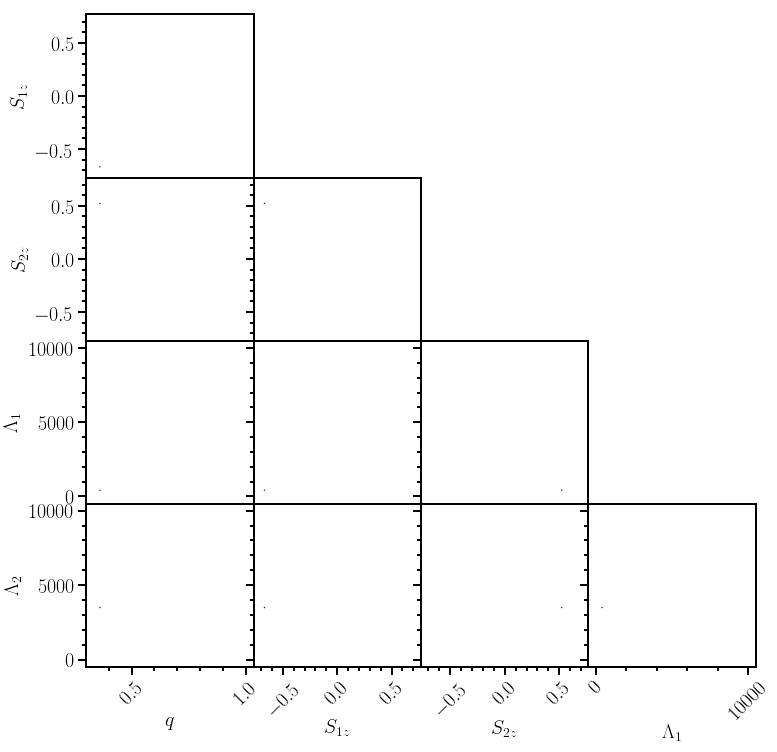

In [81]:
threshold = 0.1
#threshold = None

labels = [r'$q$', r'$S_{1z}$', r'$S_{2z}$', r'$\Lambda_1$', r'$\Lambda_2$']

params = errors_lhd[:, :5]
error = errors_lhd[:, 5]
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=threshold, figsize=(10, 10))

params = errors_uncsamp[:, :5]
error = errors_uncsamp[:, 5]
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=threshold, figsize=(10, 10))

params = errors_rand[:, :5]
error = errors_rand[:, 5]
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=threshold, figsize=(10, 10))

# RMS phase error

In [91]:
uncsamp_estimate = np.loadtxt('../data/flowp00015/uncertainty_sampling_from_lhd_trainset.txt')
uncsamp_estimate

array([[  6.797632e-01,  -7.000000e-01,   7.000000e-01,   0.000000e+00,   0.000000e+00,   2.054832e+00],
       [  6.952335e-01,  -7.000000e-01,  -7.000000e-01,   1.000000e+04,   9.672985e+03,   2.392632e+00],
       [  7.885334e-01,   7.000000e-01,   7.000000e-01,   1.000000e+04,   1.000000e+04,   1.644745e+00],
       ..., 
       [  5.545651e-01,  -2.782596e-01,   6.999998e-01,   7.373530e+02,   1.262027e-03,   5.858795e-01],
       [  1.000000e+00,  -2.075426e-01,  -7.000000e-01,   4.826631e+03,   0.000000e+00,   5.399372e-01],
       [  1.000000e+00,   4.113417e-02,  -2.318576e-01,   5.550762e+03,   1.000000e+04,   5.763764e-01]])

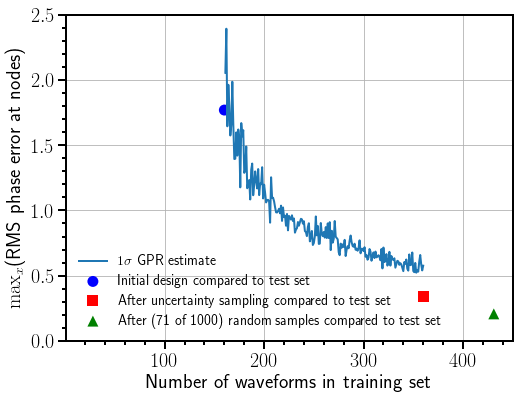

In [45]:
fig, axes = plt.subplots(1, figsize=(8, 6))

axes.plot(range(161, len(uncsamp_estimate)+161), uncsamp_estimate[:, 5], lw=2, label=r'$1\sigma$ GPR estimate')

max_lhd = np.max(errors_lhd[:, 5])
axes.scatter(160, max_lhd, c='b', edgecolor='none', marker='o', s=120, label='Initial design compared to test set')

max_uncsamp = np.max(errors_uncsamp[:, 5])
axes.scatter(360, max_uncsamp, c='r', edgecolor='none', marker='s', s=120, label='After uncertainty sampling compared to test set')

max_rand = np.max(errors_rand[:, 5])
axes.scatter(431, max_rand, c='g', edgecolor='none', marker='^', s=120, label='After (71 of 1000) random samples compared to test set')

axes.set_xlabel('Number of waveforms in training set')
axes.set_ylabel(r'$\max_x$(RMS phase error at nodes)')
axes.minorticks_on()
axes.set_xlim(1, 450)
axes.set_ylim(0, 2.5)
axes.grid()
# axes.grid(which='major')
# axes.grid(which='minor')
axes.legend(loc='lower left', frameon=False)

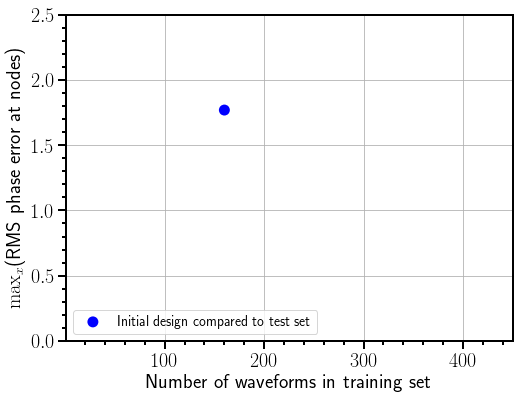

In [97]:
fig, axes = plt.subplots(1, figsize=(8, 6))

max_lhd = np.max(errors_lhd[:, 5])
axes.scatter(160, max_lhd, c='b', edgecolor='none', marker='o', s=120, label='Initial design compared to test set')

axes.set_xlabel('Number of waveforms in training set')
axes.set_ylabel(r'$\max_x$(RMS phase error at nodes)')
axes.minorticks_on()
axes.set_xlim(1, 450)
axes.set_ylim(0, 2.5)
axes.grid()
# axes.grid(which='major')
# axes.grid(which='minor')
axes.legend(loc='lower left', frameon=True)

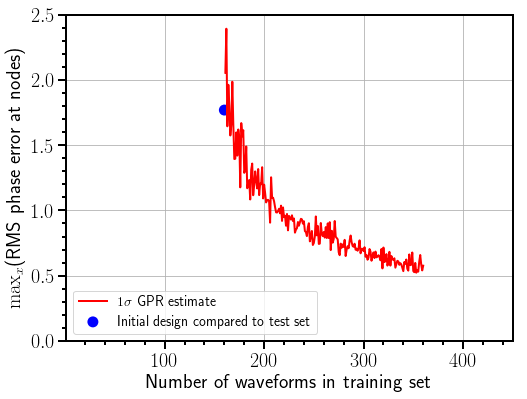

In [99]:
fig, axes = plt.subplots(1, figsize=(8, 6))

max_lhd = np.max(errors_lhd[:, 5])
axes.scatter(160, max_lhd, c='b', edgecolor='none', marker='o', s=120, label='Initial design compared to test set')

axes.plot(range(161, len(uncsamp_estimate)+161), uncsamp_estimate[:, 5], lw=2, c='r', label=r'$1\sigma$ GPR estimate')


axes.set_xlabel('Number of waveforms in training set')
axes.set_ylabel(r'$\max_x$(RMS phase error at nodes)')
axes.minorticks_on()
axes.set_xlim(1, 450)
axes.set_ylim(0, 2.5)
axes.grid()
# axes.grid(which='major')
# axes.grid(which='minor')
axes.legend(loc='lower left', frameon=True)

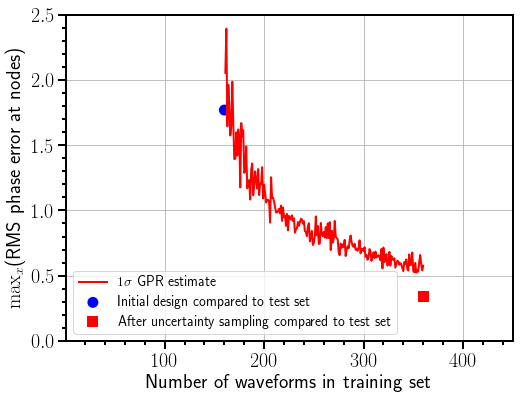

In [100]:
fig, axes = plt.subplots(1, figsize=(8, 6))

max_lhd = np.max(errors_lhd[:, 5])
axes.scatter(160, max_lhd, c='b', edgecolor='none', marker='o', s=120, label='Initial design compared to test set')

axes.plot(range(161, len(uncsamp_estimate)+161), uncsamp_estimate[:, 5], lw=2, c='r', label=r'$1\sigma$ GPR estimate')

max_uncsamp = np.max(errors_uncsamp[:, 5])
axes.scatter(360, max_uncsamp, c='r', edgecolor='none', marker='s', s=120, label='After uncertainty sampling compared to test set')

axes.set_xlabel('Number of waveforms in training set')
axes.set_ylabel(r'$\max_x$(RMS phase error at nodes)')
axes.minorticks_on()
axes.set_xlim(1, 450)
axes.set_ylim(0, 2.5)
axes.grid()
# axes.grid(which='major')
# axes.grid(which='minor')
axes.legend(loc='lower left', frameon=True)

# Plots for talk

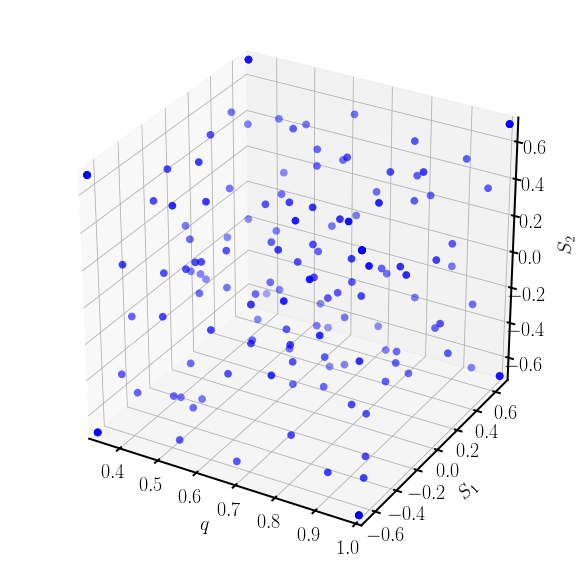

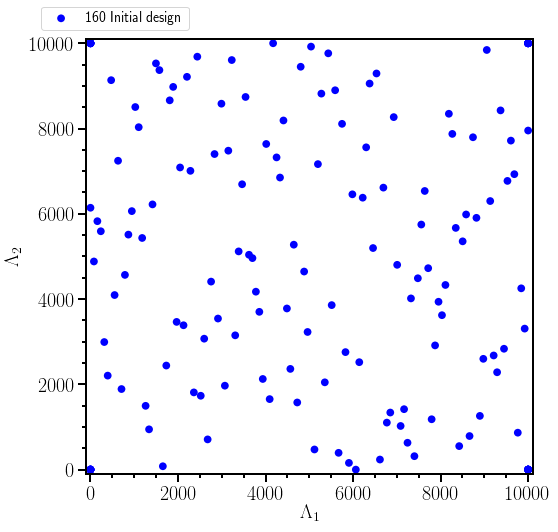

In [7]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')

x, y, z = params_lhd[:, 0], params_lhd[:, 1], params_lhd[:, 2]
axes.scatter(x, y, z, c='b', edgecolor='none', marker='o', s=60)

#x, y, z = params_uncsamp[:, 0], params_uncsamp[:, 1], params_uncsamp[:, 2]
#axes.scatter(x, y, z, c='r', edgecolor='none', marker='s', s=60)

#x, y, z = params_rand[:, 0], params_rand[:, 1], params_rand[:, 2]
#axes.scatter(x, y, z, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(0.333, 1.0)
axes.set_ylim(-0.7, 0.7)
axes.set_zlim(-0.7, 0.7)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.set_zlabel('$S_2$', labelpad=18)


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 3], params_lhd[:, 4]
axes.scatter(x, y, c='b', edgecolor='none', marker='o', s=60, label='160 Initial design')

#x, y = params_uncsamp[:, 3], params_uncsamp[:, 4]
#axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60, label='200 Uncertainty sampling')

#x, y = params_rand[:, 3], params_rand[:, 4]
#axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60, label='71 Random samples')

axes.set_xlim(-100, 10100)
axes.set_ylim(-100, 10100)
axes.set_xlabel('$\Lambda_1$')
axes.set_ylabel('$\Lambda_2$')
axes.minorticks_on()
axes.legend(ncol=3, loc=(-0.1, 1.02))

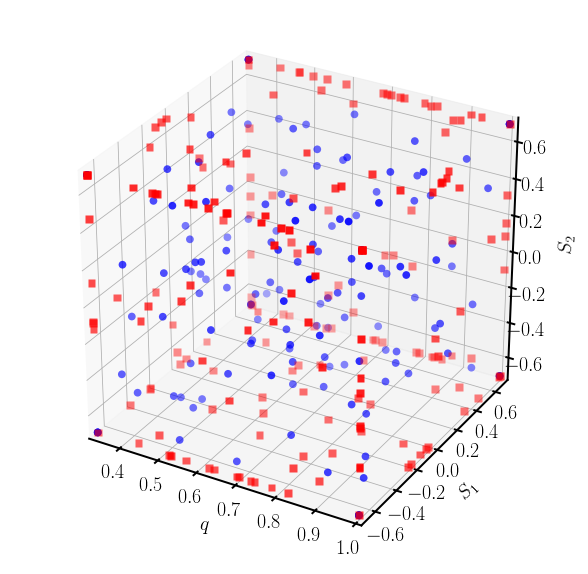

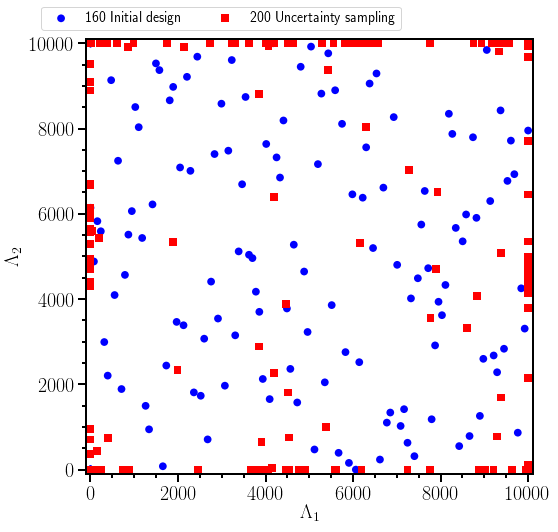

In [16]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')

x, y, z = params_lhd[:, 0], params_lhd[:, 1], params_lhd[:, 2]
axes.scatter(x, y, z, c='b', edgecolor='none', marker='o', s=60)

x, y, z = params_uncsamp[:, 0], params_uncsamp[:, 1], params_uncsamp[:, 2]
axes.scatter(x, y, z, c='r', edgecolor='none', marker='s', s=60)

#x, y, z = params_rand[:, 0], params_rand[:, 1], params_rand[:, 2]
#axes.scatter(x, y, z, c='g', edgecolor='none', marker='^', s=60)

axes.set_xlim(0.333, 1.0)
axes.set_ylim(-0.7, 0.7)
axes.set_zlim(-0.7, 0.7)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.set_zlabel('$S_2$', labelpad=18)


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 3], params_lhd[:, 4]
axes.scatter(x, y, c='b', edgecolor='none', marker='o', s=60, label='160 Initial design')

x, y = params_uncsamp[:, 3], params_uncsamp[:, 4]
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60, label='200 Uncertainty sampling')

#x, y = params_rand[:, 3], params_rand[:, 4]
#axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60, label='71 Random samples')

axes.set_xlim(-100, 10100)
axes.set_ylim(-100, 10100)
axes.set_xlabel('$\Lambda_1$')
axes.set_ylabel('$\Lambda_2$')
axes.minorticks_on()
axes.legend(ncol=3, loc=(-0.1, 1.02))

## Initial surrogate

In [29]:
testset_rand = ws.HDF5WaveformSet('../data/flowp00015/h_test_set2.hdf5')
dtestset_rand = ws.HDF5WaveformSet('../data/flowp00015/dh_test_set2.hdf5')

In [30]:
Bamp_filename = '../data/flowp00015/Bamp_lhd.hdf5'
Bphase_filename = '../data/flowp00015/Bphase_lhd.hdf5'
damp_gp_filename = '../data/flowp00015/amp_gp_lhd.hdf5'
dphase_gp_filename = '../data/flowp00015/phase_gp_lhd.hdf5'
sur_lhd = surrogate.GPSurrogate.load(Bamp_filename, Bphase_filename, damp_gp_filename, dphase_gp_filename)

749
[  3.450929e-01  -4.567520e-02   6.633498e-01   1.326938e+03   8.652185e+03   1.769155e+00   4.201326e-02
   2.867576e+00   7.331212e-04   8.192429e-04]


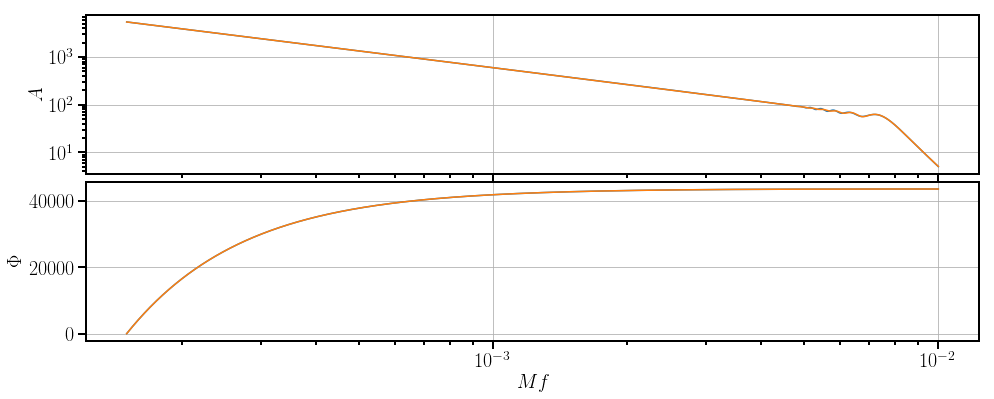

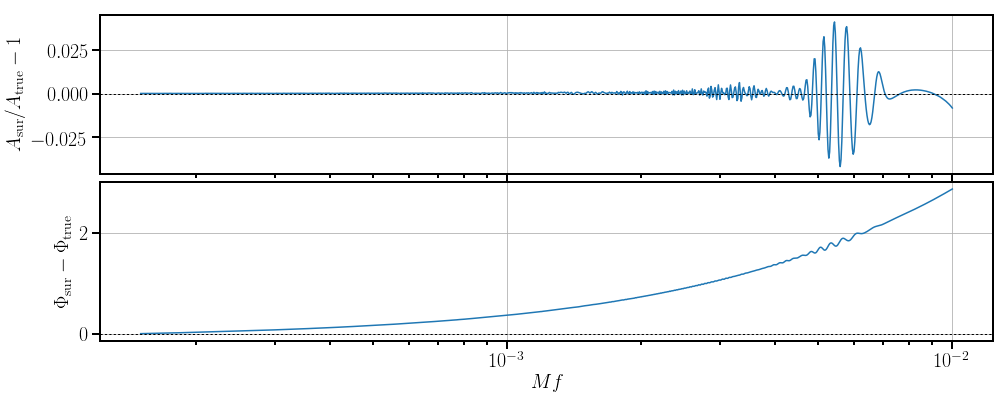

In [38]:
i = np.argmax(errors_lhd[:, 7])
print i
print errors_lhd[i]
params = testset_rand.get_waveform(i, data='parameters')
#print params

h_true = testset_rand[i]
h_sur_lhd = sur_lhd.geometric_waveform(params)

# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_sur_lhd, h_true])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Plot error
fig, (ax1, ax2) = wave.plot_waveform_difference_fd(h_sur_lhd, h_true)
ax1.set_ylabel(r'$A_{\rm sur}/A_{\rm true} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm sur} - \Phi_{\rm true}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

## Uncertainty sampling surrogate

In [26]:
Bamp_filename = '../data/flowp00015/Bamp_lhd_uncsamp.hdf5'
Bphase_filename = '../data/flowp00015/Bphase_lhd_uncsamp.hdf5'
damp_gp_filename = '../data/flowp00015/amp_gp_lhd_uncsamp.hdf5'
dphase_gp_filename = '../data/flowp00015/phase_gp_lhd_uncsamp.hdf5'
sur_uncsamp = surrogate.GPSurrogate.load(Bamp_filename, Bphase_filename, damp_gp_filename, dphase_gp_filename)

920
[  3.610553e-01  -6.688648e-01   5.227038e-01   4.201334e+02   3.496778e+03   3.421045e-01   1.854149e-02
   6.553485e-01   3.351531e-04   1.069547e-05]


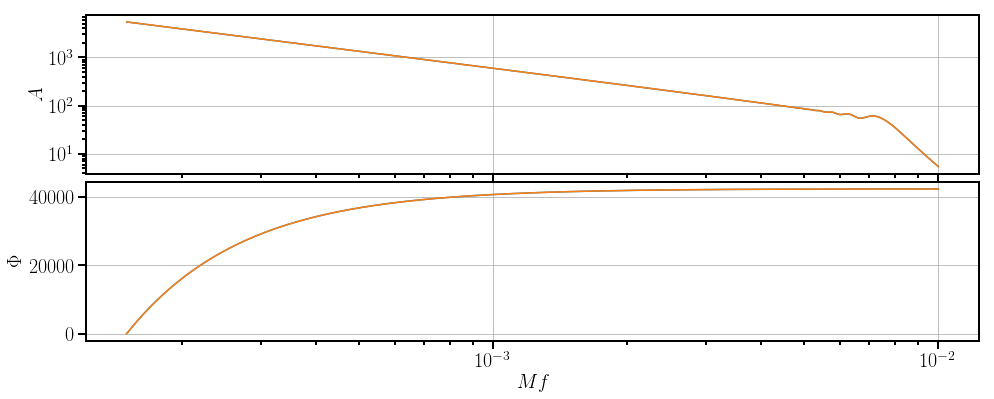

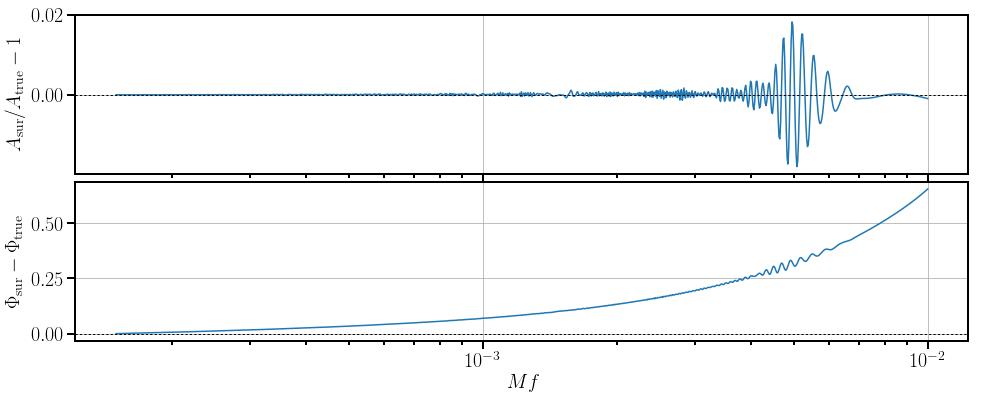

In [78]:
i = np.argmax(errors_uncsamp[:, 7])
print i
print errors_uncsamp[i]
params = testset_rand.get_waveform(i, data='parameters')
#print params

h_true = testset_rand[i]
h_sur_uncsamp = sur_uncsamp.geometric_waveform(params)

# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_sur_uncsamp, h_true])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Plot error
fig, (ax1, ax2) = wave.plot_waveform_difference_fd(h_sur_uncsamp, h_true)
ax1.set_ylabel(r'$A_{\rm sur}/A_{\rm true} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm sur} - \Phi_{\rm true}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

## Random sampling surrogate

In [36]:
Bamp_filename = '../data/flowp00015/Bamp_lhd_uncsamp_rand.hdf5'
Bphase_filename = '../data/flowp00015/Bphase_lhd_uncsamp_rand.hdf5'
damp_gp_filename = '../data/flowp00015/amp_gp_lhd_uncsamp_rand.hdf5'
dphase_gp_filename = '../data/flowp00015/phase_gp_lhd_uncsamp_rand.hdf5'
sur_rand = surrogate.GPSurrogate.load(Bamp_filename, Bphase_filename, damp_gp_filename, dphase_gp_filename)

920
[  3.610553e-01  -6.688648e-01   5.227038e-01   4.201334e+02   3.496778e+03   2.069127e-01   1.269641e-02
   3.625463e-01   2.650400e-05   6.129107e-05]


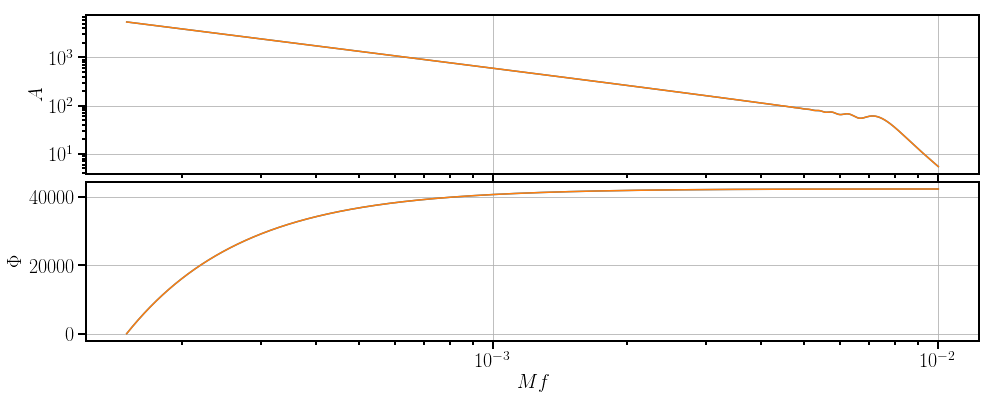

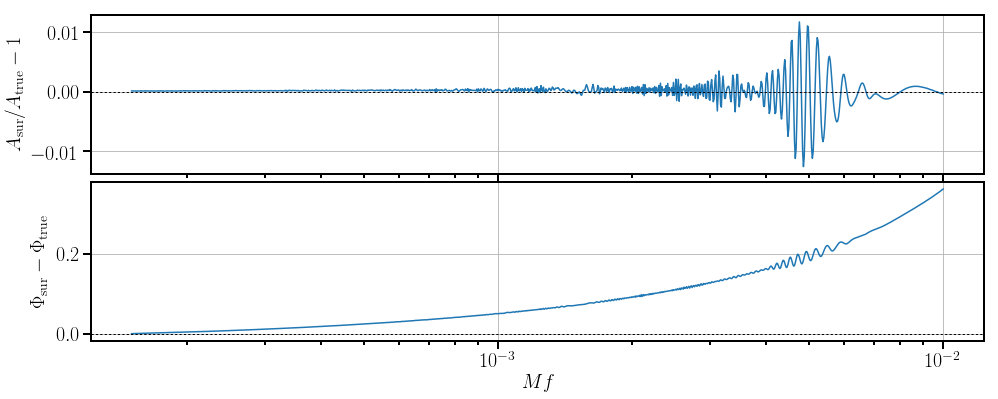

In [79]:
i = np.argmax(errors_rand[:, 7])
print i
print errors_rand[i]
params = testset_rand.get_waveform(i, data='parameters')
#print params

h_true = testset_rand[i]
h_sur_rand = sur_rand.geometric_waveform(params)

# Plot h_true and h_sur
fig, (ax1, ax2) = wave.plot_waveforms_fd([h_sur_rand, h_true])
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax2.set_ylabel(r'$\Phi$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Plot error
fig, (ax1, ax2) = wave.plot_waveform_difference_fd(h_sur_rand, h_true)
ax1.set_ylabel(r'$A_{\rm sur}/A_{\rm true} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm sur} - \Phi_{\rm true}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

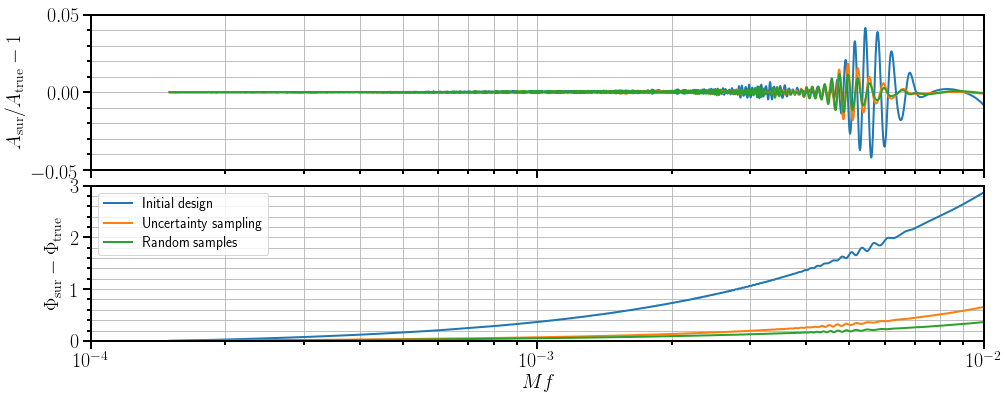

In [77]:
npoints = 10000
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16, 6))

i = np.argmax(errors_lhd[:, 7])
params = testset_rand.get_waveform(i, data='parameters')
h_true = testset_rand[i]
h_sur = sur_lhd.geometric_waveform(params)
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2)
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, label='Initial design')

i = np.argmax(errors_uncsamp[:, 7])
params = testset_rand.get_waveform(i, data='parameters')
h_true = testset_rand[i]
h_sur = sur_uncsamp.geometric_waveform(params)
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2)
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, label='Uncertainty sampling')

i = np.argmax(errors_rand[:, 7])
params = testset_rand.get_waveform(i, data='parameters')
h_true = testset_rand[i]
h_sur = sur_rand.geometric_waveform(params)
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2)
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, label='Random samples')



ax1.set_xlim(0.0001, 0.01)
ax1.set_ylim(-0.05, 0.05)
ax2.set_ylim(0.0, 3)

ax1.set_xscale('log')
ax2.set_xscale('log')
#ax2.set_yscale('log')
ax1.minorticks_on()
ax2.minorticks_on()

ax1.set_ylabel(r'$A_{\rm sur}/A_{\rm true} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm sur} - \Phi_{\rm true}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid(axis='both', which='both')
ax2.grid(axis='both', which='both')
ax2.legend(loc='upper left')

fig.subplots_adjust(hspace=0.1)

## Other

In [17]:
import lalwaveform

In [20]:
lalwaveform.print_td_approximants()

0 TaylorT1
1 TaylorT2
2 TaylorT3
15 SpinTaylorT1
16 SpinTaylorT2
18 SpinTaylorT4
23 PhenSpinTaylor
24 PhenSpinTaylorRD
36 EOBNRv2
37 EOBNRv2HM
40 TEOBResum_ROM
41 SEOBNRv1
42 SEOBNRv2
43 SEOBNRv2_opt
44 SEOBNRv3
45 SEOBNRv3_pert
46 SEOBNRv3_opt
47 SEOBNRv3_opt_rk4
48 SEOBNRv4
49 SEOBNRv4_opt
57 HGimri
58 IMRPhenomA
59 IMRPhenomB
62 IMRPhenomC
63 IMRPhenomD
65 IMRPhenomPv2
67 TaylorEt
68 TaylorT4
69 EccentricTD
73 SpinDominatedWf
74 NR_hdf5


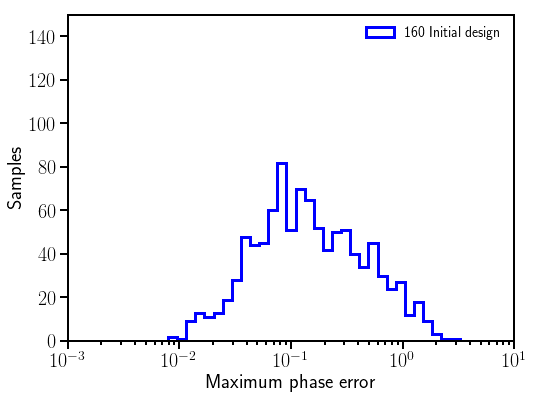

In [113]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')

ax.set_xscale('log')
ax.set_ylim(0, 150)
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('Maximum phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

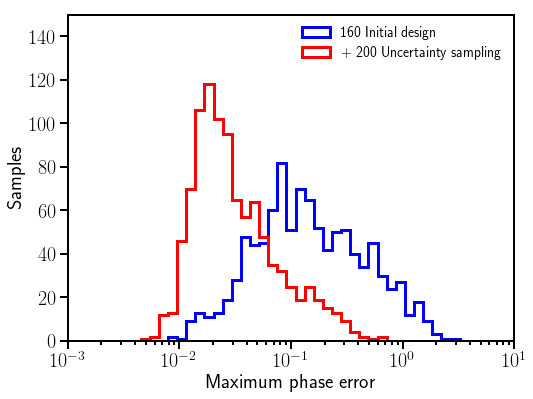

In [114]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')

ax.set_xscale('log')
ax.set_ylim(0, 150)
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('Maximum phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

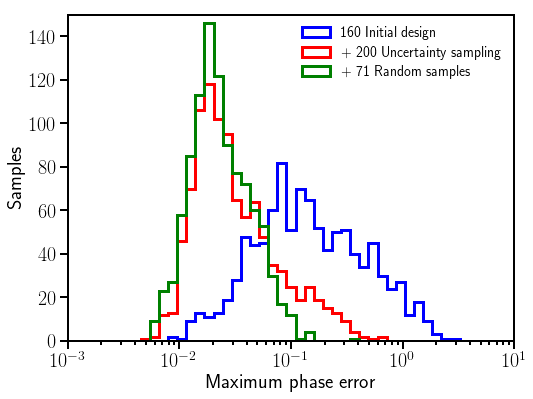

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 7], bins=np.logspace(-3, 1, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_ylim(0, 150)
ax.set_xlim([1.0e-3, 10.0])
ax.set_xlabel('Maximum phase error')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

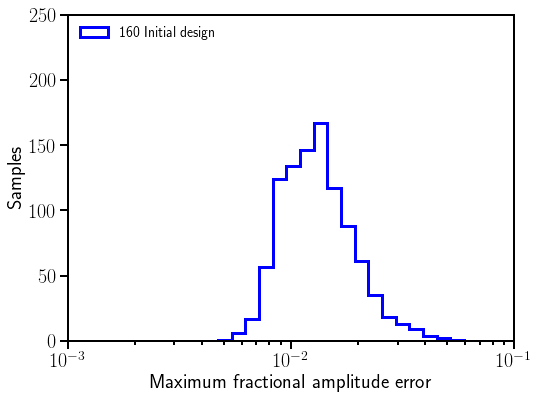

In [118]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
# ax.hist(errors_uncsamp[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
#           ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
# ax.hist(errors_rand[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
#           ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_ylim(0, 250)
ax.set_xlim([1.0e-3, 1.0e-1])
ax.set_xlabel('Maximum fractional amplitude error')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

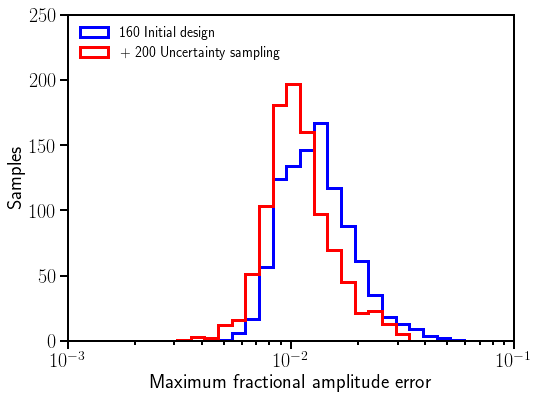

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
# ax.hist(errors_rand[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
#           ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_ylim(0, 250)
ax.set_xlim([1.0e-3, 1.0e-1])
ax.set_xlabel('Maximum fractional amplitude error')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

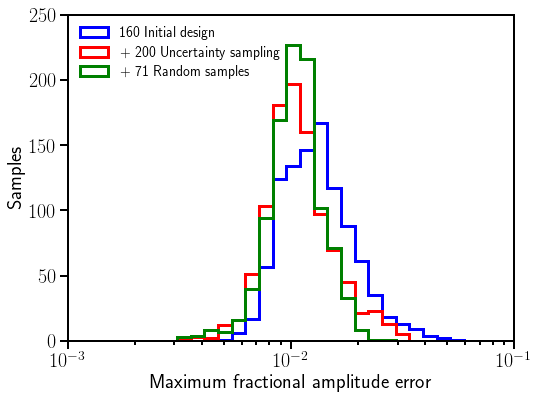

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 6], bins=np.logspace(-3, 0, 50), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_ylim(0, 250)
ax.set_xlim([1.0e-3, 1.0e-1])
ax.set_xlabel('Maximum fractional amplitude error')
ax.set_ylabel('Samples')
ax.legend(loc='upper left', frameon=False)

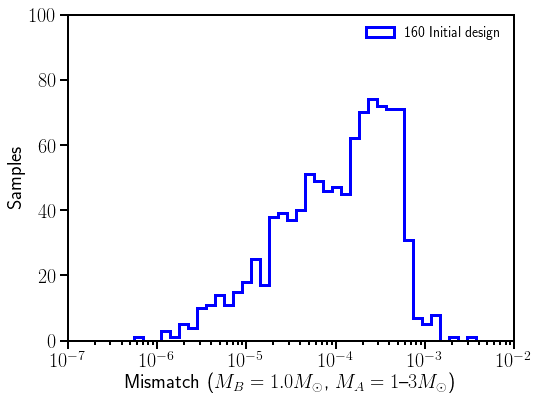

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
# ax.hist(errors_uncsamp[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
#           ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
# ax.hist(errors_rand[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
#           ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_ylim(0, 100)
ax.set_xlim([1.0e-7, 1.0e-2])
ax.set_xlabel(r'Mismatch ($M_B=1.0M_\odot$, $M_A=1$--$3M_\odot$)')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

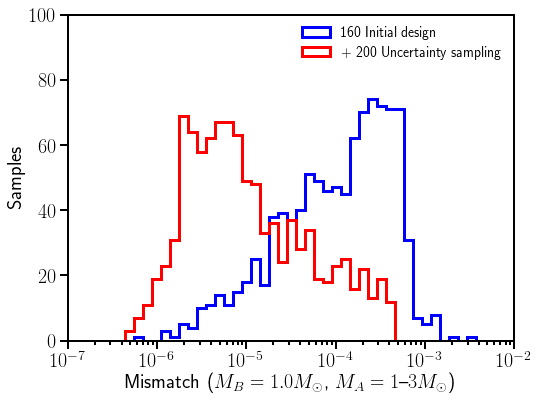

In [105]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
# ax.hist(errors_rand[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
#           ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_ylim(0, 100)
ax.set_xlim([1.0e-7, 1.0e-2])
ax.set_xlabel(r'Mismatch ($M_B=1.0M_\odot$, $M_A=1$--$3M_\odot$)')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)

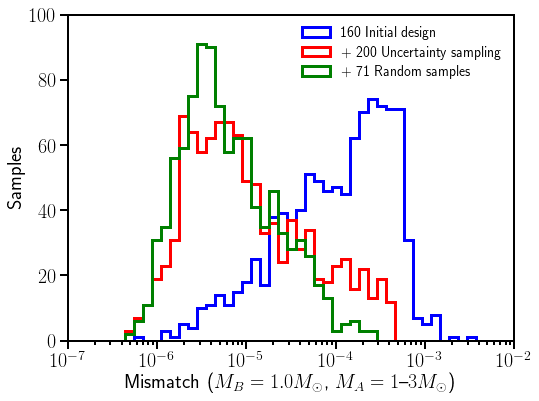

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(errors_lhd[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='blue', alpha=1.0, label=r'160 Initial design')
ax.hist(errors_uncsamp[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='red', alpha=1.0, label=r'+ 200 Uncertainty sampling')
ax.hist(errors_rand[:, 8], bins=np.logspace(-10, 0, 100), histtype='step', 
          ls='-', lw=3, color='green', alpha=1.0, label=r'+ 71 Random samples')

ax.set_xscale('log')
ax.set_ylim(0, 100)
ax.set_xlim([1.0e-7, 1.0e-2])
ax.set_xlabel(r'Mismatch ($M_B=1.0M_\odot$, $M_A=1$--$3M_\odot$)')
ax.set_ylabel('Samples')
ax.legend(loc='upper right', frameon=False)